# Simple Linear Regression - closed-form math solution

Anuj Khandelwal (@anujonthemove)

I just completed Week 1 lectures of Coursera Machine Learning course which was on Linear Regression with One Variable. While the lectures are use gradient descent learning algorithm, I wanted to implement what I already knew about linear regression - the closed-form math solution.

Simple linear regression or univariate linear regression or linear regression with one variable. <br>
** Linear model: **  $ y = \beta_0 + \beta_0x $

What does each term represent?
* $y$ is the response
* $x$ is the feature
* $\beta_0$ is the intercept
* $\beta_1$ is the coefficient for x

**Objective: ** Least Squares Estimates of model parameters (β0 and β1) using the closed-form math solution. 

**Dataset: ** [Sweden Auto Insurance data](https://www.math.muni.cz/~kolacek/docs/frvs/M7222Q/data/AutoInsurSweden.txt)

**Task: ** Predict payment for auto insurance claims in Sweden. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Utility functions

In [2]:
# calculation of model coefficients b0 and b1
def estimateCoefficients(x, y):
    
    m_x = np.mean(x)
    m_y = np.mean(y)
    
    # formula can be found at: http://www.public.iastate.edu/~alicia/stat328/Least%20Squares.pdf
    # for derivation for this formula, check the wikipedia link in reference section
    SSxy = np.sum((x-m_x)*(y-m_y)) # covariance of xy
    SSxx = np.sum(np.power((x-m_x), 2)) # variance of x
         
    b1 = SSxy / SSxx
    b0 = m_y - b1 * m_x
    return (b0, b1)

In [3]:
# Root-mean-squared-error metric / Error function
def rmseMetric(actual, predicted):
    return np.sqrt(np.mean(np.sum(np.power(actual-predicted, 2)))) 

In [4]:
# helper function for scatter plot
def scatterPlotHelper(x, y):
    
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, alpha=0.5)
    
    plt.title('Sweden Auto Insurance Dataset')
    plt.xlabel('number of claims')
    plt.ylabel('total payment(in thousands)')
    
    plt.grid()
    
    return plt

In [5]:
# function to predict values on test data
# a more optimized version would be the vectorized version
def predict(coeff, testData):
    y_pred = []
    for i in range(len(testData)):
        y_pred.append(coeff[0] + coeff[1]*testData[i])
    return y_pred

## Load data
The data set contains two columns: 
* number of insurance claims (X)
* total payments against the claims in thousands of Swedish Kronor for geographical zones in Sweden (y)

In [6]:
df = pd.read_csv('../datasets/regression/univariate-regression/auto-insurance-sweden.csv', sep=','
                 , names=['num_claims', 'total_payment'], skiprows=1)
print(df.head())

   num_claims  total_payment
0         108          392.5
1          19           46.2
2          13           15.7
3         124          422.2
4          40          119.4


## Count of rows and columns

In [7]:
# rows and columns
rows, cols = df.shape
print("rows: {}".format(rows), "cols: {}".format(cols))

('rows: 63', 'cols: 2')


## Split data
Split the data set into feature vector (X_df) and target vector (y_df)

In [8]:
# train and taget values
X_df = df.iloc[:, 0:1]
y_df = df.iloc[:, 1:2]

## Plotting the data
This is a very important step in linear regression. <br>
It is always a good idea to look at the dependent vs. independent variable plot to check for linear relationship between the predictor variable (x) and the target variable (y).

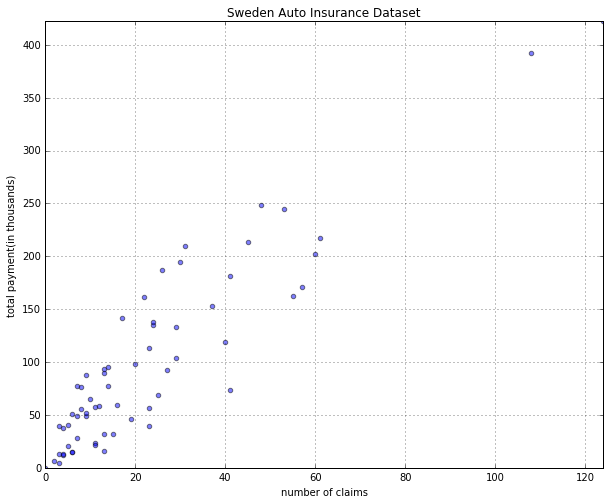

In [9]:
plt = scatterPlotHelper(X_df, y_df)
plt.xlim([0, X_df.max()[0]])
plt.ylim([0, y_df.max()[0]])
plt.show()

## Model building and accuracy check

Our task is to build a linear model i.e., estimate model coefficients: $\beta_0$ and $\beta_1$ for which we must "learn" the values of these coefficients. Once we've learned these coefficients, we can use the model to predict total payments to be made!

For linear model, the coefficients are estimated using the least squares criterion, which means we are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors").

Accuracy check is best done using cross-validation but since the data is very small, I have indeed set aside a few observation from the training data to evaluate the model. The error function or the evaluation function used here is Root Mean Squared error (RMSE).

In [10]:
# X and y are Dataframe objects, converting them to numpy arrays for easier math
X_df = np.array(X_df)
y_df = np.array(y_df)

# split train and test data
# this is best done using cross-validation, see the notebook on simple linear regression using scikit learn

# train data
X_train = X_df[:-5]
y_train = y_df[:-5]

# test data - this is used to evaluate the accuracy of our algorithm
# as for these observations we already know the actual 'y' values 
X_test = X_df[-5:]
y_test = y_df[-5:]

# train linear model on part dataset (estimate coefficients)
b = estimateCoefficients(X_train, y_train)

## Plotting the Least Squares Line
This gives an idea how the least square line fits the data.

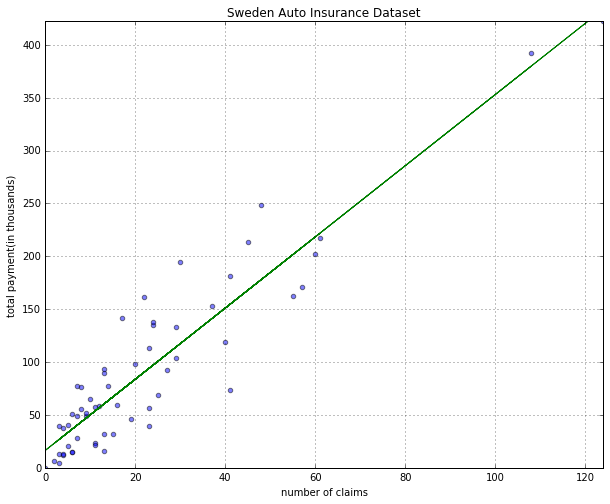

In [11]:
# plot training data
plt = scatterPlotHelper(X_train, y_train)
plt.xlim([0, max(X_train)])
plt.ylim([0, max(y_train)])

# predicted response vector
y_pred = b[0] + b[1]*X_train

# plotting the regression line
plt.plot(X_train, y_pred, color = "g")

# function to show plot
plt.show()

## RMSE
It can be seen that RMSE value is huge so it can be concluded that the model doesn't fit the data very well.<br> This can be attributed to the fact that we have a very small dataset(63 rows) for training. 

In [12]:
# Root Mean Squared Error value
predictions = predict(b, X_test)
rmse = rmseMetric(y_test, np.array(predictions))
print("RMSE value on test data: {}".format(rmse))

RMSE value on test data: 141.683636853


## Using the Model for Prediction
Using the equation: $y_{pred} = b[0] + b[1]x $, we can make predictions for total payements (y) given claims (x). <br>
Unseen, new data is used here.

In [13]:
# train linear model on the entire dataset (estimate coefficients)
b = estimateCoefficients(X_df, y_df)
print("Coefficients: {}".format(b[1]))
print("Intercept: {}".format(b[0]))

Coefficients: 3.41382356007
Intercept: 19.9944857591


In [14]:
# unseen test data set
Test_x = [31, 14, 53, 26, 100, 120, 95, 200]

# make predictions on new data
predictions = predict(b, Test_x)
print("predictions: {}".format(predictions))

predictions: [125.82301612117219, 67.788015600043948, 200.92713444263225, 108.75389832084035, 361.37684176575152, 429.65331296707882, 344.30772396541965, 702.75919777238823]


## Regression line

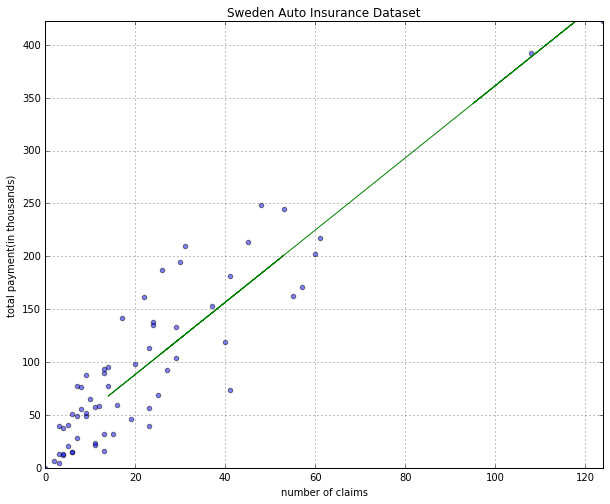

In [15]:
# with the model parameters obtained above, fit the regression line on the data 
plt = scatterPlotHelper(X_df, y_df)
plt.xlim([0, max(X_df)])
plt.ylim([0, max(y_df)])

# predicted response vector
y_pred = b[0] + b[1]*np.array(Test_x)

# plotting the regression line
plt.plot(Test_x, y_pred, color = "g")

# function to show plot
plt.show()

## References:
1. http://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/
2. https://en.wikipedia.org/wiki/Simple_linear_regression
3. https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb